# 03 Compute and plot Discrete Fourier Transform (DFT) of a signal using DFT equation.

In [22]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Signal generation

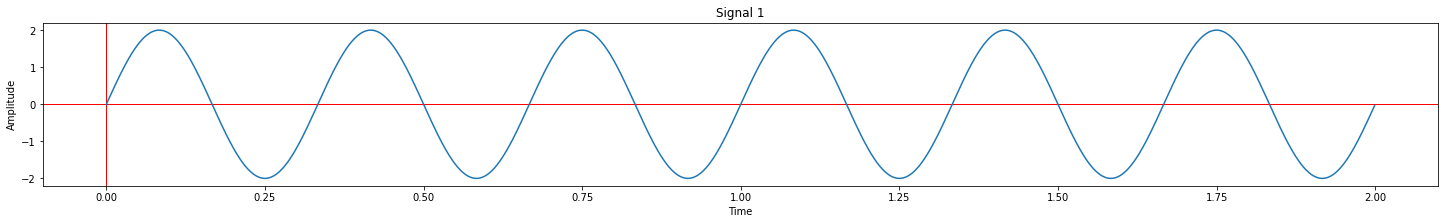

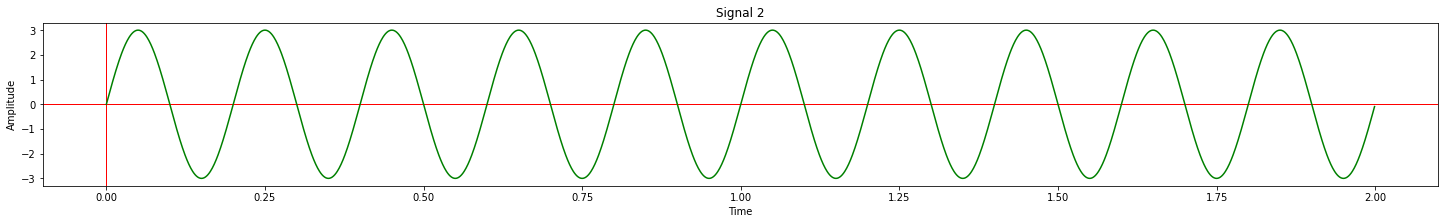

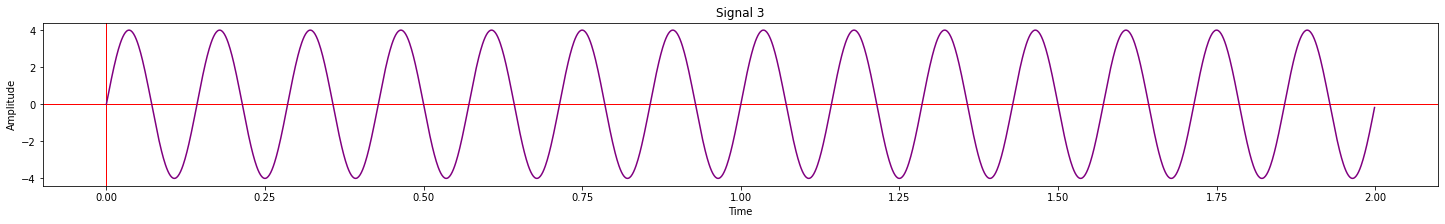

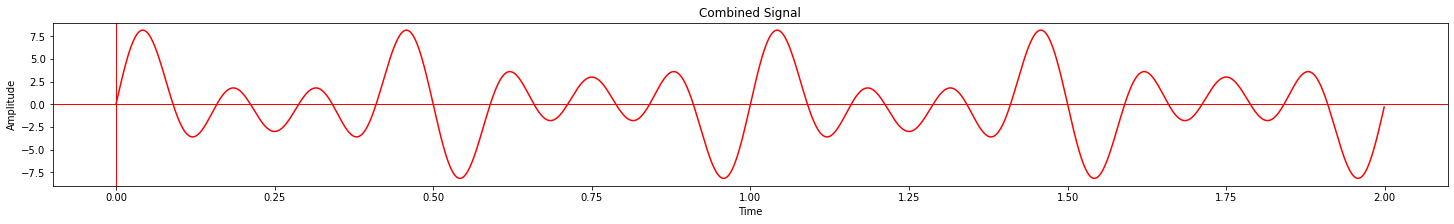

In [23]:
t = np.arange(0, 2, 0.001)

# signal 1
x1 = 2 * np.sin(2*np.pi*3*t)

plt.figure(figsize=(25,3))
plt.title('Signal 1')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, x1)

# signal 2

x2 = 3 * np.sin(2 * np.pi * 5 * t)

plt.figure(figsize=(25,3))
plt.title('Signal 2')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, x2, color='green')

# signal 3

x3 = 4 * np.sin(2 * np.pi * 7 * t)

plt.figure(figsize=(25,3))
plt.title('Signal 3')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, x3, color='purple')

# Combined Signal

x = x1 + x2 + x3

plt.figure(figsize=(25,3))
plt.title('Combined Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, x, color='red')


## Discrete Fourier Transformation

In [24]:
def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


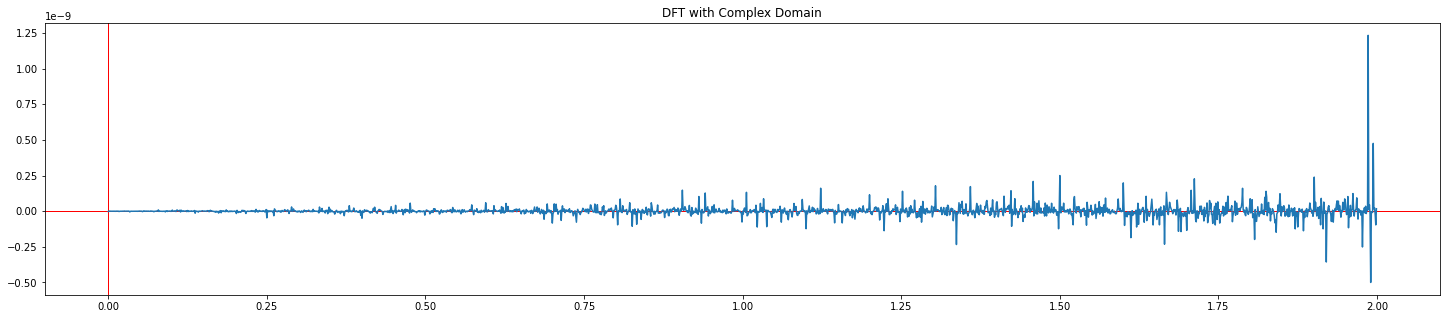

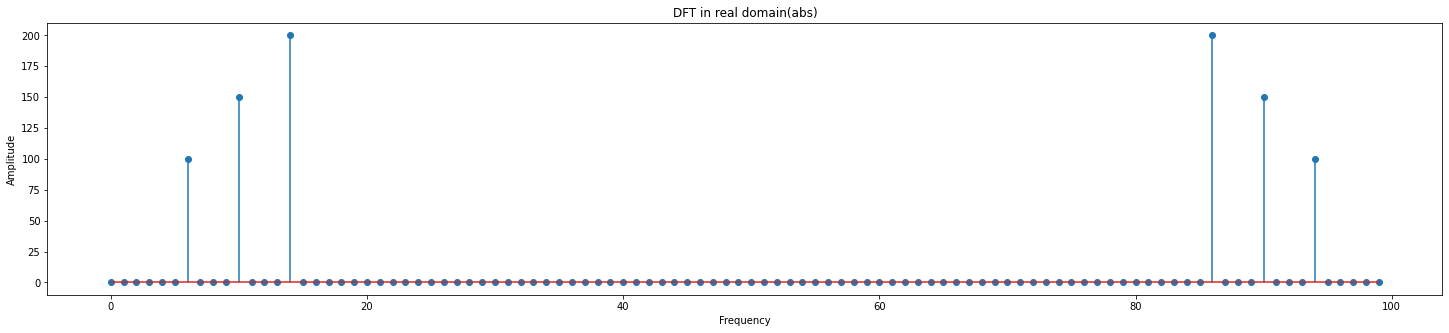

In [25]:
# fourier transform

N = len(x)
s = 100
fs = int(s/2)
ts = 1/fs
n = np.arange(0, s, 1)

unsampled = DFT(x)
plt.figure(figsize = (25,5))
plt.title('DFT with Complex Domain')
plt.axvline(linewidth = '1', color = 'r')
plt.axhline(linewidth = '1', color = 'r')
plt.plot(t, unsampled)

sampled_signal = []
for i in range(0, N, int(N/s)):
  sampled_signal.append(x[i])

X = DFT(np.array(sampled_signal))

plt.figure(figsize = (25,5))
plt.stem(n, abs(X))
plt.title('DFT in real domain(abs)')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


<StemContainer object of 3 artists>

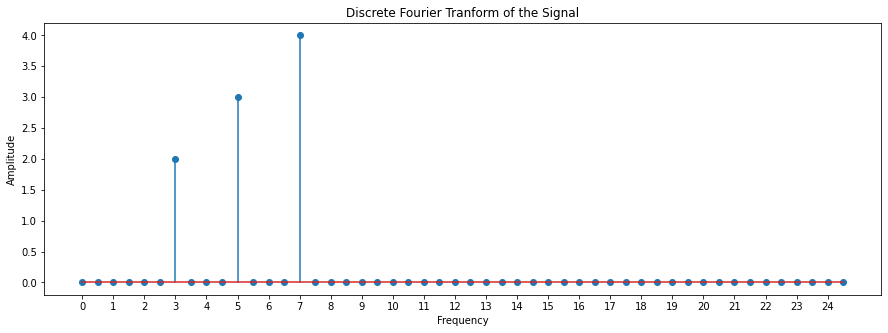

In [5]:
n_leftside = s//2
# left side of the nyquist rate
f_leftside = n[:n_leftside]

# normalize the amplitude
X_leftside =2*X[:n_leftside]/s

plt.figure(figsize = (15,5))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier Tranform of the Signal')
plt.xticks(range(0,25))
plt.stem(f_leftside*(fs/s), abs(X_leftside))